# NN - Project - Part 2

### PROJECT OBJECTIVE:
* PROJECT OBJECTIVE: Build a digit classifier on the SVHN (Street View Housing Number) dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder

import h5py

#tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input,Dropout,BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.regularizers import l2


In [4]:
# Load the dataset from Drive

data = h5py.File('/content/drive/MyDrive/GL/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5')
data.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [5]:
x_train = data['X_train']
x_val = data['X_val']
x_test = data['X_test']

y_train = data['y_train']
y_val = data['y_val']
y_test = data['y_test']

In [74]:
y_test = LabelEncoder().fit_transform(y_test)

In [6]:
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [7]:
y_train[0:50]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3, 1, 0, 1, 3, 1, 1, 0, 0, 8, 4, 6, 5,
       7, 9, 1, 0, 3, 0, 7, 2, 1, 1, 0, 2, 9, 0, 2, 5, 1, 3, 2, 7, 9, 8,
       4, 9, 4, 5, 9, 3], dtype=uint8)

In [8]:
# print the shape of train and test images

print('Shape of train images',x_train.shape)
print('Shape of val images',x_val.shape)
print('Shape of test images',x_test.shape)

Shape of train images (42000, 32, 32)
Shape of val images (60000, 32, 32)
Shape of test images (18000, 32, 32)


In [9]:

# print the shape of labels

print('Shape of train labels',y_train.shape)
print('Shape of val labels',y_val.shape)
print('Shape of test labels',y_test.shape)

Shape of train labels (42000,)
Shape of val labels (60000,)
Shape of test labels (18000,)


In [10]:
#selecting random samples
index = np.random.choice(x_train.shape[0],10) #for genrating random index postions
index

array([ 8322, 11546, 28942, 17946, 30692, 26349, 32988, 25186,  5364,
       37510])

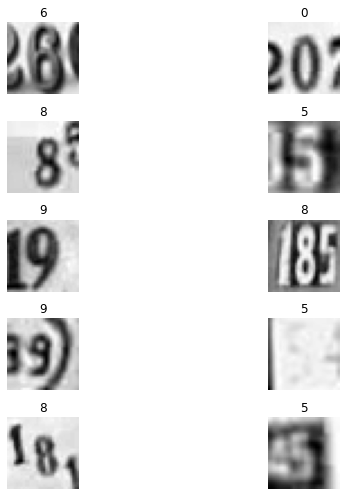

In [11]:
#display images
plt.figure(figsize=(10,7))
for i, ind in enumerate(index):
  plt.subplot(5,2,i+1)
  plt.imshow(x_train[ind],cmap='gray')
  plt.title(y_train[ind])
  plt.axis('off')
plt.tight_layout();

In [12]:
#encoding labels

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes=10)
y_val = to_categorical(y_val,num_classes=10)
# y_test = to_categorical(y_test,num_classes=10)

In [14]:
#number of classes
 
num_classes =  y_train.shape[1]

print('The number of classes in this dataset are : ', num_classes)

The number of classes in this dataset are :  10


In [15]:
x_train = np.asarray(x_train).reshape(x_train.shape[0],1024)
x_val = np.asarray(x_val).reshape(x_val.shape[0],1024)

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_val = x_val / 255.0

### Model building

#### SGD optimizer

In [16]:
model_1 = Sequential([
                      Flatten(input_shape=(1024,)),
                      Dense(128,activation='relu',name='dense_1'),
                      Dropout(0.2),
                      BatchNormalization(),
                      Dense(64,activation='relu',name='dense_2'),
                      Dropout(0.2),
                      BatchNormalization(),
                      Dense(32,activation='relu',name='dense_3'),
                      Dense(10,activation='softmax',name='dense_4')
  ])
model_1.compile(optimizer= tf.keras.optimizers.SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])


In [17]:
x_train[0].shape

(1024,)

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                2

In [19]:
#train the model  
history= model_1.fit(x_train,
                   y_train,epochs=30,
                   batch_size=32,validation_data=(x_val,y_val),
                   verbose=1,
                   )

Epoch 1/30
1313/1313 [==============================] - 8s 5ms/step - loss: 2.3531 - accuracy: 0.1309 - val_loss: 2.1267 - val_accuracy: 0.2223
Epoch 2/30
1313/1313 [==============================] - 6s 5ms/step - loss: 2.1404 - accuracy: 0.1984 - val_loss: 1.9258 - val_accuracy: 0.2918
Epoch 3/30
1313/1313 [==============================] - 6s 5ms/step - loss: 2.1973 - accuracy: 0.1701 - val_loss: 2.3075 - val_accuracy: 0.1010
Epoch 4/30
1313/1313 [==============================] - 6s 5ms/step - loss: 2.2119 - accuracy: 0.1612 - val_loss: 1.9541 - val_accuracy: 0.3016
Epoch 5/30
1313/1313 [==============================] - 6s 5ms/step - loss: 2.0720 - accuracy: 0.2248 - val_loss: 1.9771 - val_accuracy: 0.2663
Epoch 6/30
1313/1313 [==============================] - 6s 4ms/step - loss: 2.0397 - accuracy: 0.2425 - val_loss: 1.8864 - val_accuracy: 0.3489
Epoch 7/30
1313/1313 [==============================] - 6s 5ms/step - loss: 1.9806 - accuracy: 0.2830 - val_loss: 1.7468 - val_accuracy:

#### SGD optimizer with learning rate 1e-3

In [20]:
model_1.compile(optimizer= tf.keras.optimizers.SGD(0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#fit the model
history_1= model_1.fit(x_train,
                   y_train,epochs=30,
                   batch_size=32,validation_data=(x_val,y_val),verbose=1,
                   )

Epoch 1/30
1313/1313 [==============================] - 7s 5ms/step - loss: 1.6865 - accuracy: 0.4281 - val_loss: 1.4814 - val_accuracy: 0.5404
Epoch 2/30
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6932 - accuracy: 0.4267 - val_loss: 1.4482 - val_accuracy: 0.5587
Epoch 3/30
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6814 - accuracy: 0.4297 - val_loss: 1.4560 - val_accuracy: 0.5519
Epoch 4/30
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6858 - accuracy: 0.4272 - val_loss: 1.4526 - val_accuracy: 0.5521
Epoch 5/30
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6900 - accuracy: 0.4282 - val_loss: 1.4702 - val_accuracy: 0.5429
Epoch 6/30
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6868 - accuracy: 0.4241 - val_loss: 1.4687 - val_accuracy: 0.5460
Epoch 7/30
1313/1313 [==============================] - 6s 5ms/step - loss: 1.6906 - accuracy: 0.4270 - val_loss: 1.4519 - val_accuracy:

In [21]:
#  Validation accuracy achieved 0.648 with SGD optimizer with learning rate of 1e-3

#### Adam optimizer, increased number of units

In [85]:
model_2 = Sequential([
                      Flatten(input_shape=(1024,)),
                      Dense(256,activation='relu',name='dense_1'),
                      Dense(128,activation='relu',name='dense_2'),
                      Dense(64,activation='relu',name='dense_3'),
                      Dense(32,activation='relu',name='dense_4'),
                      Dense(10,activation='softmax',name='dense_5')
  ])
model_2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])


In [86]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 305,962
Trainable params: 305,962
Non-trainable params: 0
________________________________________________

In [87]:
#fit the model
history= model_2.fit(x_train,
                   y_train,epochs=100,
                   batch_size=256,validation_data=(x_val,y_val),verbose=1,
                   )

Epoch 1/100
165/165 [==============================] - 3s 18ms/step - loss: 2.2916 - accuracy: 0.1193 - val_loss: 2.2345 - val_accuracy: 0.1597
Epoch 2/100
165/165 [==============================] - 3s 17ms/step - loss: 2.1246 - accuracy: 0.2085 - val_loss: 2.0111 - val_accuracy: 0.2582
Epoch 3/100
165/165 [==============================] - 3s 17ms/step - loss: 1.8540 - accuracy: 0.3328 - val_loss: 1.8433 - val_accuracy: 0.3529
Epoch 4/100
165/165 [==============================] - 3s 17ms/step - loss: 1.5627 - accuracy: 0.4675 - val_loss: 1.5115 - val_accuracy: 0.4776
Epoch 5/100
165/165 [==============================] - 3s 17ms/step - loss: 1.3965 - accuracy: 0.5385 - val_loss: 1.4007 - val_accuracy: 0.5391
Epoch 6/100
165/165 [==============================] - 3s 17ms/step - loss: 1.2925 - accuracy: 0.5776 - val_loss: 1.2932 - val_accuracy: 0.5760
Epoch 7/100
165/165 [==============================] - 3s 17ms/step - loss: 1.2158 - accuracy: 0.6089 - val_loss: 1.2891 - val_accuracy:

### Plotting Accuracy vs Val Accuracy

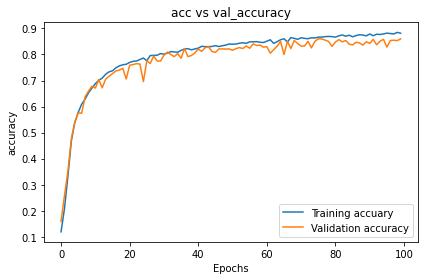

In [88]:
# plot accuracy vs Validation accuracy

# plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label= "Training accuary")
plt.plot(history.history['val_accuracy'],label= "Validation accuracy")
plt.legend()
plt.title('acc vs val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.tight_layout()

Text(0, 0.5, 'Loss')

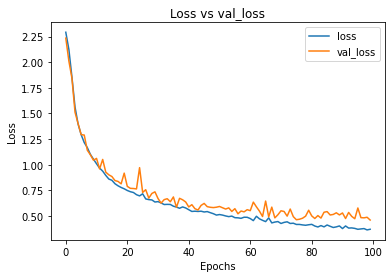

In [89]:
# plot loss vs Validation loss
  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss vs val_loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')

### model evaluation on test data

In [92]:
test_loss,test_accuracy = model_2.evaluate(x_test, tf.keras.utils.to_categorical(y_test),verbose=0)

print('test_loss=',test_loss,'test_accuracy =',test_accuracy)

test_loss= 107.06404113769531 test_accuracy = 0.7889999747276306


## Observation

* Validation accuracy achieved on test dataset is 78.89%, using Adam optimzer, with learning rate 1e-3, model trained for 100 epochs
*  Tried various options like increasing number of hidden layers, hidden units, increased number of epochs also decreasing learning rate and dropout and bactch normalization
* We can try applying CNN and improve the accuracy further


---------

In [76]:
# ### model predictions

# def plot_pred(images,labels,predictions):
#   fig, axes = plt.subplots(5,2,figsize=(15,8))
#   for i in range(5):
#     axes[i,0].imshow(images[i])
#     axes[i,0].set_title(f'Label = {labels[i]}')
#     axes[i,0].set_axis_off()
    
#     axes[i,1].bar(range(10),predictions[i])
#     axes[i,1].set_title(f'Predicted label = {np.argmax(predictions[i])}')
#     axes.set_xticks()
#   plt.tight_layout()

In [77]:
# #display_random images with predictions
# np.random.seed(42)
# random_index = np.random.choice(len(x_test),5)

In [81]:
# #plot prediction on 5 ransom samples

# x_test = np.asarray(x_test)

# random_test_images = x_test[random_index]

# random_test_labels = y_test[random_index]
# predictions = model_1.predict(random_test_images)

# # plot_pred(random_test_images,random_test_labels,predictions)

# plot_pred(x_test,random_test_labels,model_1) 